In [2]:
import numpy as np
import xarray as xr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 14

In [3]:
surf_layer = 1
high_layer = 8
# filepath = f"/data/keeling/a/xx24/d/cares_output/"
fp = '/data/keeling/a/xx24/d/proj_film/'

In [4]:
file = xr.open_dataset("~/d/cares_output/00/map_001_001_001_00000037.nc")
sc_edges = file['sc_edges']
diam_edges = file['diam_edges']
ratio1 = np.log(sc_edges[1]/sc_edges[0])
ratio2 = np.log(diam_edges[1]/diam_edges[0])
cell = ratio1*ratio2

In [5]:
def rel_err(var_cs, var_vs):
    if np.any(var_vs == 0):
        result = np.zeros_like(var_cs)
    else:
        result = (var_cs - var_vs) / var_vs
    return  - result*100

def diam_sc(filename, var, a, b):  
    before_compress = np.sum(filename[var][:19], axis=0)
    result = sum(before_compress[a:b])
    return result*cell

In [6]:
from joblib import Parallel, delayed

In [11]:
diam_sc_cs_40     = np.empty((169, 159))
diam_sc_cs_70     = np.empty((169, 159))
diam_sc_cs_100    = np.empty((169, 159))
diam_sc_cs_500   = np.empty((169, 159))
diam_sc_vs_40     = np.empty((169, 159))
diam_sc_vs_70     = np.empty((169, 159))
diam_sc_vs_100    = np.empty((169, 159))
diam_sc_vs_500   = np.empty((169, 159))

# And for the 1-km (high) layer group:
diam_sc_cs_40_1km = np.empty((169, 159))
diam_sc_cs_70_1km = np.empty((169, 159))
diam_sc_cs_100_1km= np.empty((169, 159))
diam_sc_cs_500_1km = np.empty((169, 159))
diam_sc_vs_40_1km = np.empty((169, 159))
diam_sc_vs_70_1km = np.empty((169, 159))
diam_sc_vs_100_1km= np.empty((169, 159))
diam_sc_vs_500_1km = np.empty((169, 159))


def process_file(i, j, layer):
    filename = f"/data/keeling/a/xx24/d/cares_output/00/map_{i:03d}_{j:03d}_{layer:03d}_{37:08d}.nc"

    with xr.open_dataset(filename) as ds:
        val_cs_40  = diam_sc(ds, 'diam_sc_dist', 30, 48)
        val_cs_70  = diam_sc(ds, 'diam_sc_dist', 48, 57)
        val_cs_100 = diam_sc(ds, 'diam_sc_dist', 57, 60)
        val_cs_500 = diam_sc(ds, 'diam_sc_dist', 60, 180)
        
        val_vs_40  = diam_sc(ds, 'diam_sc_varying_sigma_dist', 30, 48)
        val_vs_70  = diam_sc(ds, 'diam_sc_varying_sigma_dist', 48, 57)
        val_vs_100 = diam_sc(ds, 'diam_sc_varying_sigma_dist', 57, 60)
        val_vs_500 = diam_sc(ds, 'diam_sc_varying_sigma_dist', 60, 180)

    return (i, j, 
        val_cs_40,  val_cs_70,  val_cs_100, val_cs_500,
        val_vs_40,  val_vs_70,  val_vs_100, val_vs_500)

# Number of jobs = number of CPU cores you want to use
n_jobs = 8  

results_surf = Parallel(n_jobs=n_jobs)(
    delayed(process_file)(i, j, surf_layer) 
    for i in range(1, 170)
    for j in range(1, 160)
)

for (i, j, 
     val_cs_40, val_cs_70, val_cs_100, val_cs_500,
     val_vs_40, val_vs_70, val_vs_100, val_vs_500) in results_surf:
    
    diam_sc_cs_40[i-1, j-1]  = val_cs_40
    diam_sc_cs_70[i-1, j-1]  = val_cs_70
    diam_sc_cs_100[i-1, j-1] = val_cs_100
    diam_sc_cs_500[i-1, j-1] = val_cs_500
    
    diam_sc_vs_40[i-1, j-1]  = val_vs_40
    diam_sc_vs_70[i-1, j-1]  = val_vs_70
    diam_sc_vs_100[i-1, j-1] = val_vs_100
    diam_sc_vs_500[i-1, j-1] = val_vs_500

results_high = Parallel(n_jobs=n_jobs)(
    delayed(process_file)(i, j, high_layer) 
    for i in range(1, 170)
    for j in range(1, 160)
)

for (i, j, 
     val_cs_40, val_cs_70, val_cs_100, val_cs_500,
     val_vs_40, val_vs_70, val_vs_100, val_vs_500) in results_high:
    
    diam_sc_cs_40_1km[i-1, j-1]  = val_cs_40
    diam_sc_cs_70_1km[i-1, j-1]  = val_cs_70
    diam_sc_cs_100_1km[i-1, j-1] = val_cs_100
    diam_sc_cs_500_1km[i-1, j-1] = val_cs_500
    
    diam_sc_vs_40_1km[i-1, j-1]  = val_vs_40
    diam_sc_vs_70_1km[i-1, j-1]  = val_vs_70
    diam_sc_vs_100_1km[i-1, j-1] = val_vs_100
    diam_sc_vs_500_1km[i-1, j-1] = val_vs_500

In [12]:
diam_sc_cs_12_40     = np.empty((169, 159))
diam_sc_cs_12_70     = np.empty((169, 159))
diam_sc_cs_12_100    = np.empty((169, 159))
diam_sc_cs_12_500   = np.empty((169, 159))
diam_sc_vs_12_40     = np.empty((169, 159))
diam_sc_vs_12_70     = np.empty((169, 159))
diam_sc_vs_12_100    = np.empty((169, 159))
diam_sc_vs_12_500   = np.empty((169, 159))

diam_sc_cs_12_40_1km = np.empty((169, 159))
diam_sc_cs_12_70_1km = np.empty((169, 159))
diam_sc_cs_12_100_1km= np.empty((169, 159))
diam_sc_cs_12_500_1km = np.empty((169, 159))
diam_sc_vs_12_40_1km = np.empty((169, 159))
diam_sc_vs_12_70_1km = np.empty((169, 159))
diam_sc_vs_12_100_1km= np.empty((169, 159))
diam_sc_vs_12_500_1km = np.empty((169, 159))

def process_file_12(i, j, layer):
    filename = f"/data/keeling/a/xx24/d/cares_output/12/map_{i:03d}_{j:03d}_{layer:03d}_{12:08d}.nc"

    # Use a context manager so the file is closed immediately after reading
    with xr.open_dataset(filename) as ds:
        val_cs_40  = diam_sc(ds, 'diam_sc_dist',               30, 48)
        val_cs_70  = diam_sc(ds, 'diam_sc_dist',               48, 57)
        val_cs_100 = diam_sc(ds, 'diam_sc_dist',               57, 60)
        val_cs_500 = diam_sc(ds, 'diam_sc_dist',               60, 180)
        val_vs_40  = diam_sc(ds, 'diam_sc_varying_sigma_dist', 30, 48)
        val_vs_70  = diam_sc(ds, 'diam_sc_varying_sigma_dist', 48, 57)
        val_vs_100 = diam_sc(ds, 'diam_sc_varying_sigma_dist', 57, 60)
        val_vs_500 = diam_sc(ds, 'diam_sc_varying_sigma_dist', 60, 180)

    return (i, j, 
            val_cs_40, val_cs_70, val_cs_100, val_cs_500,
            val_vs_40, val_vs_70, val_vs_100, val_vs_500)

n_jobs = 8  # Number of CPU cores (or processes) to use

# Run parallel for the surface layer
results_12_surf = Parallel(n_jobs=n_jobs)(
    delayed(process_file_12)(i, j, surf_layer) 
    for i in range(1, 170)
    for j in range(1, 160)
)

# Place the results into your arrays
for (i, j, 
     val_cs_40, val_cs_70, val_cs_100, val_cs_500,
     val_vs_40, val_vs_70, val_vs_100, val_vs_500) in results_12_surf:
    
    # Convert to zero-based indices
    ii, jj = i - 1, j - 1

    diam_sc_cs_12_40[ii, jj]   = val_cs_40
    diam_sc_cs_12_70[ii, jj]   = val_cs_70
    diam_sc_cs_12_100[ii, jj]  = val_cs_100
    diam_sc_cs_12_500[ii, jj] = val_cs_500

    diam_sc_vs_12_40[ii, jj]   = val_vs_40
    diam_sc_vs_12_70[ii, jj]   = val_vs_70
    diam_sc_vs_12_100[ii, jj]  = val_vs_100
    diam_sc_vs_12_500[ii, jj] = val_vs_500

results_12_high = Parallel(n_jobs=n_jobs)(
    delayed(process_file_12)(i, j, high_layer) 
    for i in range(1, 170)
    for j in range(1, 160)
)

for (i, j, 
     val_cs_40, val_cs_70, val_cs_100, val_cs_500,
     val_vs_40, val_vs_70, val_vs_100, val_vs_500) in results_12_high:
    
    ii, jj = i - 1, j - 1

    diam_sc_cs_12_40_1km[ii, jj]  = val_cs_40
    diam_sc_cs_12_70_1km[ii, jj]  = val_cs_70
    diam_sc_cs_12_100_1km[ii, jj] = val_cs_100
    diam_sc_cs_12_500_1km[ii, jj] = val_cs_500

    diam_sc_vs_12_40_1km[ii, jj]  = val_vs_40
    diam_sc_vs_12_70_1km[ii, jj]  = val_vs_70
    diam_sc_vs_12_100_1km[ii, jj] = val_vs_100
    diam_sc_vs_12_500_1km[ii, jj] = val_vs_500    

In [ ]:
pd.DataFrame(diam_sc_cs_40).to_csv(f'{fp}ccn_cs_40',index=False, header=False)
pd.DataFrame(diam_sc_cs_70).to_csv(f'{fp}ccn_cs_70',index=False, header=False)
pd.DataFrame(diam_sc_cs_100).to_csv(f'{fp}ccn_cs_100',index=False, header=False)
pd.DataFrame(diam_sc_cs_500).to_csv(f'{fp}ccn_cs_500',index=False, header=False)
pd.DataFrame(diam_sc_vs_40).to_csv(f'{fp}ccn_vs_40',index=False, header=False)
pd.DataFrame(diam_sc_vs_70).to_csv(f'{fp}ccn_vs_70',index=False, header=False)
pd.DataFrame(diam_sc_vs_100).to_csv(f'{fp}ccn_vs_100',index=False, header=False)
pd.DataFrame(diam_sc_vs_500).to_csv(f'{fp}ccn_vs_500',index=False, header=False)

pd.DataFrame(diam_sc_cs_40_1km).to_csv(f'{fp}ccn_cs_40_1km',index=False, header=False)
pd.DataFrame(diam_sc_cs_70_1km).to_csv(f'{fp}ccn_cs_70_1km',index=False, header=False)
pd.DataFrame(diam_sc_cs_100_1km).to_csv(f'{fp}ccn_cs_100_1km',index=False, header=False)
pd.DataFrame(diam_sc_cs_500_1km).to_csv(f'{fp}ccn_cs_500_1km',index=False, header=False)
pd.DataFrame(diam_sc_vs_40_1km).to_csv(f'{fp}ccn_vs_40_1km',index=False, header=False)
pd.DataFrame(diam_sc_vs_70_1km).to_csv(f'{fp}ccn_vs_70_1km',index=False, header=False)
pd.DataFrame(diam_sc_vs_100_1km).to_csv(f'{fp}ccn_vs_100_1km',index=False, header=False)
pd.DataFrame(diam_sc_vs_500_1km).to_csv(f'{fp}ccn_vs_500_1km',index=False, header=False)

In [14]:
pd.DataFrame(diam_sc_cs_12_40).to_csv(f'{fp}ccn_cs_12_40',index=False, header=False)
pd.DataFrame(diam_sc_cs_12_70).to_csv(f'{fp}ccn_cs_12_70',index=False, header=False)
pd.DataFrame(diam_sc_cs_12_100).to_csv(f'{fp}ccn_cs_12_100',index=False, header=False)
pd.DataFrame(diam_sc_cs_12_500).to_csv(f'{fp}ccn_cs_12_500',index=False, header=False)
pd.DataFrame(diam_sc_vs_12_40).to_csv(f'{fp}ccn_vs_12_40',index=False, header=False)
pd.DataFrame(diam_sc_vs_12_70).to_csv(f'{fp}ccn_vs_12_70',index=False, header=False)
pd.DataFrame(diam_sc_vs_12_100).to_csv(f'{fp}ccn_vs_12_100',index=False, header=False)
pd.DataFrame(diam_sc_vs_12_500).to_csv(f'{fp}ccn_vs_12_500',index=False, header=False)

pd.DataFrame(diam_sc_cs_12_40_1km).to_csv(f'{fp}ccn_cs_12_40_1km',index=False, header=False)
pd.DataFrame(diam_sc_cs_12_70_1km).to_csv(f'{fp}ccn_cs_12_70_1km',index=False, header=False)
pd.DataFrame(diam_sc_cs_12_100_1km).to_csv(f'{fp}ccn_cs_12_100_1km',index=False, header=False)
pd.DataFrame(diam_sc_cs_12_500_1km).to_csv(f'{fp}ccn_cs_12_500_1km',index=False, header=False)
pd.DataFrame(diam_sc_vs_12_40_1km).to_csv(f'{fp}ccn_vs_12_40_1km',index=False, header=False)
pd.DataFrame(diam_sc_vs_12_70_1km).to_csv(f'{fp}ccn_vs_12_70_1km',index=False, header=False)
pd.DataFrame(diam_sc_vs_12_100_1km).to_csv(f'{fp}ccn_vs_12_100_1km',index=False, header=False)
pd.DataFrame(diam_sc_vs_12_500_1km).to_csv(f'{fp}ccn_vs_12_500_1km',index=False, header=False)

In [8]:
# surface
ccn_cs = pd.read_csv(f'{fp}ccn_cs_00', sep=',', header=None)
ccn_vs = pd.read_csv(f'{fp}ccn_vs_00', sep=',', header=None)
# 1km
ccn_cs_1km = pd.read_csv(f'{fp}ccn_cs_00_1km', sep=',', header=None)
ccn_vs_1km = pd.read_csv(f'{fp}ccn_vs_00_1km', sep=',', header=None)

ccn_error = rel_err(ccn_cs, ccn_vs)
ccn_error_1km = rel_err(ccn_cs_1km, ccn_vs_1km)

In [9]:
ccn_cs_12 = pd.read_csv(f'{fp}ccn_cs_12', sep=',', header=None)
ccn_vs_12 = pd.read_csv(f'{fp}ccn_vs_12', sep=',', header=None)

ccn_cs_12_1km = pd.read_csv(f'{fp}ccn_cs_12_1km', sep=',', header=None)
ccn_vs_12_1km = pd.read_csv(f'{fp}ccn_vs_12_1km', sep=',', header=None)

ccn_error_12 = rel_err(ccn_cs_12, ccn_vs_12)
ccn_error_12_1km = rel_err(ccn_cs_12_1km, ccn_vs_12_1km)

In [10]:
diam_sc_cs_40  = pd.read_csv(f'{fp}ccn_cs_40' , sep=',', header=None)
diam_sc_cs_70  = pd.read_csv(f'{fp}ccn_cs_70' , sep=',', header=None)
diam_sc_cs_100 = pd.read_csv(f'{fp}ccn_cs_100', sep=',', header=None)
diam_sc_cs_500 = pd.read_csv(f'{fp}ccn_cs_500', sep=',', header=None)
diam_sc_vs_40  = pd.read_csv(f'{fp}ccn_vs_40' , sep=',', header=None)
diam_sc_vs_70  = pd.read_csv(f'{fp}ccn_vs_70' , sep=',', header=None)
diam_sc_vs_100 = pd.read_csv(f'{fp}ccn_vs_100', sep=',', header=None)
diam_sc_vs_500 = pd.read_csv(f'{fp}ccn_vs_500', sep=',', header=None)

diam_sc_cs_40_1km  = pd.read_csv(f'{fp}ccn_cs_40_1km' , sep=',', header=None)
diam_sc_cs_70_1km  = pd.read_csv(f'{fp}ccn_cs_70_1km' , sep=',', header=None)
diam_sc_cs_100_1km = pd.read_csv(f'{fp}ccn_cs_100_1km', sep=',', header=None)
diam_sc_cs_500_1km = pd.read_csv(f'{fp}ccn_cs_500_1km', sep=',', header=None)
diam_sc_vs_40_1km  = pd.read_csv(f'{fp}ccn_vs_40_1km' , sep=',', header=None)
diam_sc_vs_70_1km  = pd.read_csv(f'{fp}ccn_vs_70_1km' , sep=',', header=None)
diam_sc_vs_100_1km = pd.read_csv(f'{fp}ccn_vs_100_1km', sep=',', header=None)
diam_sc_vs_500_1km = pd.read_csv(f'{fp}ccn_vs_500_1km', sep=',', header=None)

In [11]:
diam_sc_cs_12_40 = pd.read_csv(f'{fp}ccn_cs_12_40' , sep=',', header=None)
diam_sc_cs_12_70 = pd.read_csv(f'{fp}ccn_cs_12_70' , sep=',', header=None)
diam_sc_cs_12_100 =pd.read_csv(f'{fp}ccn_cs_12_100', sep=',', header=None)
diam_sc_cs_12_500 =pd.read_csv(f'{fp}ccn_cs_12_500', sep=',', header=None)
diam_sc_vs_12_40 = pd.read_csv(f'{fp}ccn_vs_12_40' , sep=',', header=None)
diam_sc_vs_12_70 = pd.read_csv(f'{fp}ccn_vs_12_70' , sep=',', header=None)
diam_sc_vs_12_100 =pd.read_csv(f'{fp}ccn_vs_12_100', sep=',', header=None)
diam_sc_vs_12_500 =pd.read_csv(f'{fp}ccn_vs_12_500', sep=',', header=None)

diam_sc_cs_12_40_1km = pd.read_csv(f'{fp}ccn_cs_12_40_1km' , sep=',', header=None)
diam_sc_cs_12_70_1km = pd.read_csv(f'{fp}ccn_cs_12_70_1km' , sep=',', header=None)
diam_sc_cs_12_100_1km =pd.read_csv(f'{fp}ccn_cs_12_100_1km', sep=',', header=None)
diam_sc_cs_12_500_1km =pd.read_csv(f'{fp}ccn_cs_12_500_1km', sep=',', header=None)
diam_sc_vs_12_40_1km = pd.read_csv(f'{fp}ccn_vs_12_40_1km' , sep=',', header=None)
diam_sc_vs_12_70_1km = pd.read_csv(f'{fp}ccn_vs_12_70_1km' , sep=',', header=None)
diam_sc_vs_12_100_1km =pd.read_csv(f'{fp}ccn_vs_12_100_1km', sep=',', header=None)
diam_sc_vs_12_500_1km =pd.read_csv(f'{fp}ccn_vs_12_500_1km', sep=',', header=None)

In [12]:
diam_sc_40_error = rel_err(diam_sc_cs_40, diam_sc_vs_40)
diam_sc_70_error = rel_err(diam_sc_cs_70, diam_sc_vs_70)
diam_sc_100_error = rel_err(diam_sc_cs_100, diam_sc_vs_100)
diam_sc_500_error = rel_err(diam_sc_cs_500, diam_sc_vs_500)
diam_sc_40_error_1km = rel_err(diam_sc_cs_40_1km, diam_sc_vs_40_1km)
diam_sc_70_error_1km = rel_err(diam_sc_cs_70_1km, diam_sc_vs_70_1km)
diam_sc_100_error_1km = rel_err(diam_sc_cs_100_1km, diam_sc_vs_100_1km)
diam_sc_500_error_1km = rel_err(diam_sc_cs_500_1km, diam_sc_vs_500_1km)

In [13]:
diam_sc_12_40_error = rel_err(diam_sc_cs_12_40, diam_sc_vs_12_40)
diam_sc_12_70_error = rel_err(diam_sc_cs_12_70, diam_sc_vs_12_70)
diam_sc_12_100_error = rel_err(diam_sc_cs_12_100, diam_sc_vs_12_100)
diam_sc_12_500_error = rel_err(diam_sc_cs_12_500, diam_sc_vs_12_500)
diam_sc_12_40_error_1km = rel_err(diam_sc_cs_12_40_1km, diam_sc_vs_12_40_1km)
diam_sc_12_70_error_1km = rel_err(diam_sc_cs_12_70_1km, diam_sc_vs_12_70_1km)
diam_sc_12_100_error_1km = rel_err(diam_sc_cs_12_100_1km, diam_sc_vs_12_100_1km)
diam_sc_12_500_error_1km = rel_err(diam_sc_cs_12_500_1km, diam_sc_vs_12_500_1km)

In [14]:
sc_error_compare = pd.DataFrame({
    'error': np.concatenate([ccn_error.values.ravel(), ccn_error_1km.values.ravel()]),
    'type': ['surface']*len(ccn_error.values.ravel()) + ['1 km']*len(ccn_error_1km.values.ravel())
})

sc_40_error_compare = pd.DataFrame({
    'error': np.concatenate([diam_sc_40_error.flatten(), diam_sc_40_error_1km.flatten()]),
    'type': ['surface'] * len(diam_sc_40_error.flatten()) + ['1 km'] * len(diam_sc_40_error_1km.flatten()),
    'diam_range': ['10-40 nm'] * (len(diam_sc_40_error.flatten()) + len(diam_sc_40_error_1km.flatten()))
})

sc_70_error_compare = pd.DataFrame({
    'error': np.concatenate([diam_sc_70_error.values.ravel(), diam_sc_70_error_1km.values.ravel()]),
    'type': ['surface'] * len(diam_sc_70_error.values.ravel()) + ['1 km'] * len(diam_sc_70_error_1km.values.ravel()),
    'diam_range': ['40-70 nm'] * (len(diam_sc_70_error.values.ravel()) + len(diam_sc_70_error_1km.values.ravel()))
})

sc_100_error_compare = pd.DataFrame({
    'error': np.concatenate([diam_sc_100_error.values.ravel(), diam_sc_100_error_1km.values.ravel()]),
    'type': ['surface'] * len(diam_sc_100_error.values.ravel()) + ['1 km'] * len(diam_sc_100_error_1km.values.ravel()),
    'diam_range': ['70-100 nm'] * (len(diam_sc_100_error.values.ravel()) + len(diam_sc_100_error_1km.values.ravel()))
})

sc_500_error_compare = pd.DataFrame({
    'error': np.concatenate([diam_sc_500_error.values.ravel(), diam_sc_500_error_1km.values.ravel()]),
    'type': ['surface'] * len(diam_sc_500_error.values.ravel()) + ['1 km'] * len(diam_sc_500_error_1km.values.ravel()),
    'diam_range': ['>100 nm'] * (len(diam_sc_500_error.values.ravel()) + len(diam_sc_500_error_1km.values.ravel()))
})

df_combined = pd.concat([sc_40_error_compare, sc_70_error_compare, sc_100_error_compare, sc_500_error_compare], ignore_index=True)
df_combined

,error,type,diam_range
0,-0.0,surface,10-40 nm
1,-0.0,surface,10-40 nm
2,-0.0,surface,10-40 nm
3,-0.0,surface,10-40 nm
4,-0.0,surface,10-40 nm
...,...,...,...
214963,-0.0,1 km,>100 nm
214964,-0.0,1 km,>100 nm
214965,-0.0,1 km,>100 nm
214966,-0.0,1 km,>100 nm


In [15]:
sc_error_compare_12 = pd.DataFrame({
    'error': np.concatenate([ccn_error_12.values.ravel(), ccn_error_12_1km.values.ravel()]),
    'type': ['surface']*len(ccn_error_12.values.ravel()) + ['1 km']*len(ccn_error_12_1km.values.ravel())
})

sc_40_error_compare_12 = pd.DataFrame({
    'error': np.concatenate([diam_sc_12_40_error.flatten(), diam_sc_12_40_error_1km.flatten()]),
    'type': ['surface'] * len(diam_sc_12_40_error.flatten()) + ['1 km'] * len(diam_sc_12_40_error_1km.flatten()),
    'diam_range': ['10-40 nm'] * (len(diam_sc_12_40_error.flatten()) + len(diam_sc_12_40_error_1km.flatten()))
})

sc_70_error_compare_12 = pd.DataFrame({
    'error': np.concatenate([diam_sc_12_70_error.values.ravel(), diam_sc_12_70_error_1km.values.ravel()]),
    'type': ['surface'] * len(diam_sc_12_70_error.values.ravel()) + ['1 km'] * len(diam_sc_12_70_error_1km.values.ravel()),
    'diam_range': ['40-70 nm'] * (len(diam_sc_12_70_error.values.ravel()) + len(diam_sc_12_70_error_1km.values.ravel()))
})

sc_100_error_compare_12 = pd.DataFrame({
    'error': np.concatenate([diam_sc_12_100_error.values.ravel(), diam_sc_12_100_error_1km.values.ravel()]),
    'type': ['surface'] * len(diam_sc_12_100_error.values.ravel()) + ['1 km'] * len(diam_sc_12_100_error_1km.values.ravel()),
    'diam_range': ['70-100 nm'] * (len(diam_sc_12_100_error.values.ravel()) + len(diam_sc_12_100_error_1km.values.ravel()))
})

sc_500_error_compare_12 = pd.DataFrame({
    'error': np.concatenate([diam_sc_12_500_error.values.ravel(), diam_sc_12_500_error_1km.values.ravel()]),
    'type': ['surface'] * len(diam_sc_12_500_error.values.ravel()) + ['1 km'] * len(diam_sc_12_500_error_1km.values.ravel()),
    'diam_range': ['>100 nm'] * (len(diam_sc_12_500_error.values.ravel()) + len(diam_sc_12_500_error_1km.values.ravel()))
})

df_combined_12 = pd.concat([sc_40_error_compare_12, sc_70_error_compare_12, sc_100_error_compare_12, sc_500_error_compare_12], ignore_index=True)

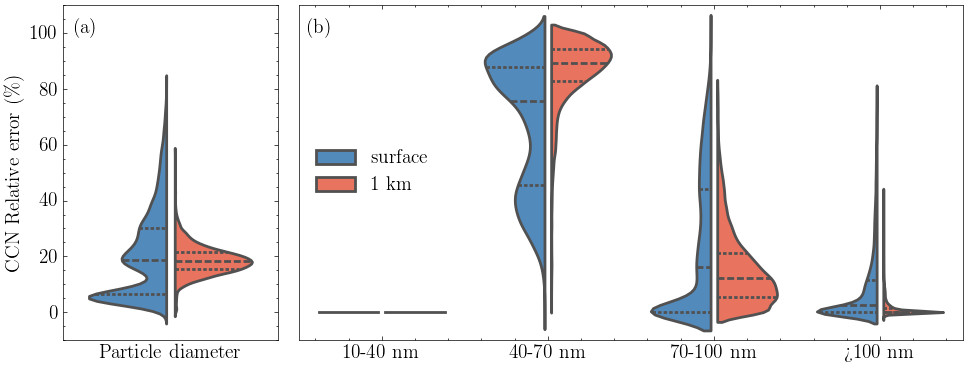

In [20]:
# Create a figure with a 1x4 grid of subplots
fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1,  2, 1])

# Create subplots within the grid
axes = [fig.add_subplot(gs[0, 0]),  fig.add_subplot(gs[0, 1:3])]

sns.violinplot(data=sc_error_compare, y="error", x=np.zeros_like(sc_error_compare['error']), hue="type", gap=.1, palette=["#428BCD", "#FF6347"], linewidth=2, inner='quart', split=True, ax=axes[0], dodge=True, width=0.8, density_norm='width')
axes[0].set_xticks([])
axes[0].get_legend().remove() 
axes[0].set_xlabel("Particle diameter")
axes[0].set_ylabel(r"CCN Relative error (\%)")
axes[0].set_ylim(-10, 110)
axes[0].text(x =-0.45, y = 100, s='(a)')
axes[0].legend().remove()

sns.violinplot(data=df_combined, x="diam_range", y="error", hue="type", gap=.1, palette=["#428BCD", "#FF6347"], split=True, linewidth=2, inner='quart', ax=axes[1], dodge=True, width=0.8, density_norm='width')
axes[1].set_yticks([])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_ylim(-10, 110)
axes[1].text(x =-0.45, y = 100, s='(b)')
axes[1].legend(loc=6,frameon=False)


plt.tight_layout()

# plt.savefig('ccn_rel_with_size.pdf', bbox_inches='tight',dpi=300)

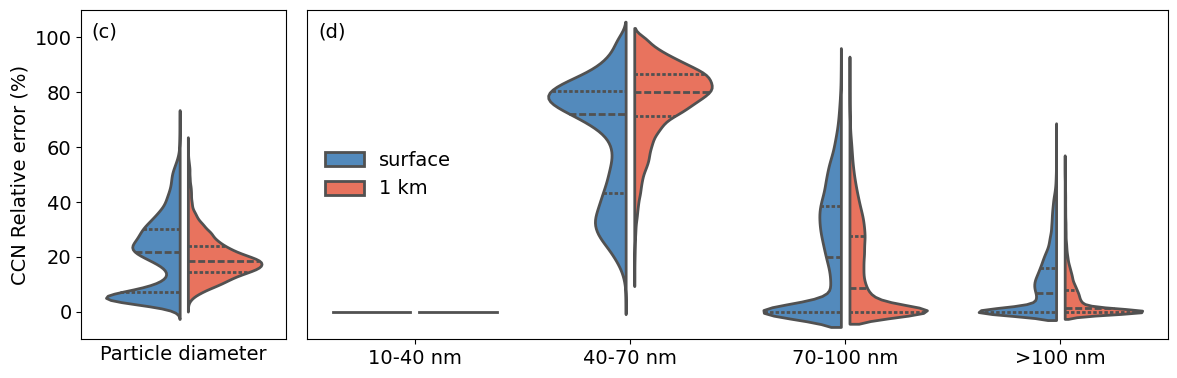

In [61]:
# Create a figure with a 1x4 grid of subplots
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 4, width_ratios=[1, 2, 1, 1])

# Create subplots within the grid
axes = [fig.add_subplot(gs[0, 0]),  fig.add_subplot(gs[0, 1:4])]

sns.violinplot(data=sc_error_compare_12, y="error", x=np.zeros_like(sc_error_compare['error']), hue="type", gap=.1, palette=["#428BCD", "#FF6347"], linewidth=2, inner='quart', split=True, ax=axes[0], dodge=True, width=0.8, density_norm='width')
axes[0].set_xticks([])
axes[0].get_legend().remove() 
axes[0].set_xlabel("Particle diameter")
axes[0].set_ylabel("CCN Relative error (%)")
axes[0].set_ylim(-10, 110)
axes[0].text(x =-0.45, y = 100, s='(c)')
axes[0].legend().remove()

sns.violinplot(data=df_combined_12, x="diam_range", y="error", hue="type", gap=.1, palette=["#428BCD", "#FF6347"], split=True, linewidth=2, inner='quart', ax=axes[1], dodge=True, width=0.8, density_norm='width')
axes[1].set_yticks([])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_ylim(-10, 110)
axes[1].text(x =-0.45, y = 100, s='(d)')
axes[1].legend(loc=6,frameon=False)


plt.tight_layout()

# plt.savefig('ccn_rel_err_with_size_12.pdf', bbox_inches='tight',dpi=300)

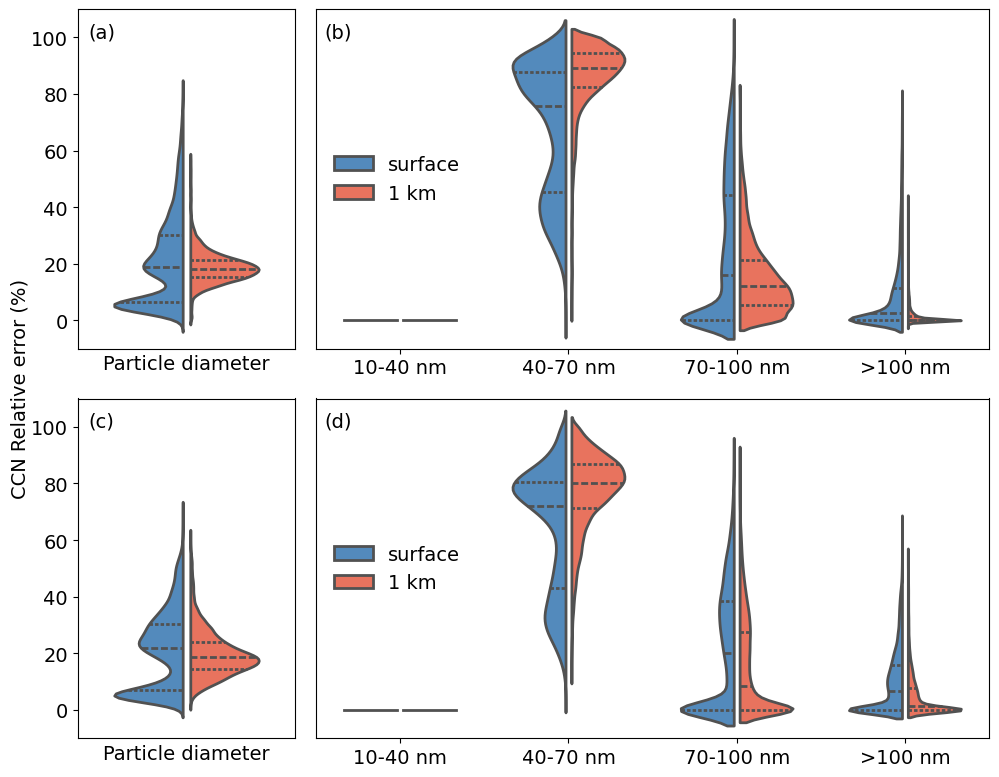

In [70]:
# Create a figure with a 2x2 grid of subplots
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 2, 1], height_ratios=[1, 1])

# Create subplots within the grid
axes = [
    [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:3])],  # First row
    [fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1:3])]   # Second row
]

# Function to plot violin plots
def plot_violin(ax_left, ax_right, data_left, data_right, title_left, title_right, ylabel_left=None, ylabel_right=None):
    # Plot left subplot
    sns.violinplot(data=data_left, y="error", x=np.zeros_like(data_left['error']), hue="type", gap=.1, 
                   palette=["#428BCD", "#FF6347"], linewidth=2, inner='quart', split=True, ax=ax_left, dodge=True, width=0.7, density_norm='width')
    ax_left.set_xticks([])
    ax_left.get_legend().remove()
    ax_left.set_xlabel("Particle diameter")
    ax_left.set_ylabel(ylabel_left)
    ax_left.set_ylim(-10, 110)
    ax_left.text(x=-0.45, y=100, s=title_left)
    
    # Plot right subplot
    sns.violinplot(data=data_right, x="diam_range", y="error", hue="type", gap=.1, 
                   palette=["#428BCD", "#FF6347"], split=True, linewidth=2, inner='quart', ax=ax_right, dodge=True, width=0.7, density_norm='width')
    ax_right.set_yticks([])
    ax_right.set_xlabel('')
    ax_right.set_ylabel('')
    ax_right.set_ylim(-10, 110)
    ax_right.text(x=-0.45, y=100, s=title_right)
    ax_right.legend(loc=6, frameon=False)

# Plot first row (sc_error_compare and df_combined)
plot_violin(axes[0][0], axes[0][1], sc_error_compare, df_combined, '(a)', '(b)')

# Plot second row (sc_error_compare_12 and df_combined_12)
plot_violin(axes[1][0], axes[1][1], sc_error_compare_12, df_combined_12, '(c)', '(d)')

fig.text(0, 0.5, 'CCN Relative error (%)', va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()
plt.savefig('/data/keeling/a/xx24/d/proj_film/ccn_rel_err_with_size.pdf', bbox_inches='tight',dpi=300)
# plt.show()